In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, glob
import numpy as np
from PIL import Image
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import transforms, models
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
positives = "/content/drive/MyDrive/Datasets/static_dataset/StaticA"
negatives = "/content/drive/MyDrive/Datasets/static_dataset/StaticN"

positives = np.array(glob.glob(positives + "/*.jpg"))
negatives = np.array(glob.glob(negatives + "/*.jpg"))

print("length of positives" ,len(positives))
print("length of negatives" , len(negatives))

train_images = []
train_labels = []
test_images = []
test_labels = []

training_positive, testing_positive = train_test_split(positives, test_size=0.2, random_state=42)
training_negative, testing_negative = train_test_split(negatives, test_size=0.2, random_state=42)

print("length of training positives" , len(training_positive))
print("length of testing positives" , len(testing_positive))
print("lenth of training negatives" , len(training_negative))
print("length of testing negatives" , len(testing_negative))


for i in training_positive:
  img = Image.open(i)
  train_images.append(np.array(img))
  train_labels.append(1)

for i in testing_positive:
  img = Image.open(i)
  test_images.append(np.array(img))
  test_labels.append(1)

for i in training_negative:
  img = Image.open(i)
  train_images.append(np.array(img))
  train_labels.append(0)

for i in testing_negative:
  img = Image.open(i)
  test_images.append(np.array(img))
  test_labels.append(0)

print(len(train_images), len(train_labels))
print(len(test_images), len(test_labels))




length of positives 124
length of negatives 132
length of training positives 99
length of testing positives 25
lenth of training negatives 105
length of testing negatives 27
204 204
52 52


In [ ]:
print(train_images[0])
print(train_labels[0])
print(train_images[1].shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1
(480, 640)


In [1]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        #returns total number of images
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(label, dtype=torch.long)
        return image, label

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    #transforms.repeat(3, 1, 1),
    transforms.Resize((228, 228)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),  # Rotates images by up to 15 degrees
    transforms.RandomResizedCrop(size=(227, 227), scale=(0.8, 1.0)), # Randomly crops and resizes images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])

])

train_dataset = CustomDataset(images=train_images, labels=train_labels, transform=transform)
test_dataset = CustomDataset(images=test_images, labels=test_labels, transform=transform)
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

NameError: name 'Dataset' is not defined

torch.Size([3, 227, 227])
tensor(1)


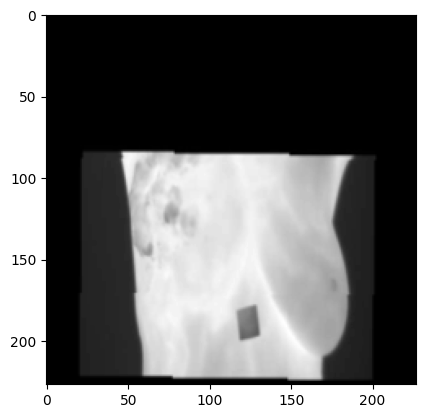

In [ ]:
data, label = train_dataset[0]
print(data.shape)
print(label)
plt.imshow(data[0], cmap='gray')
plt.show()

In [ ]:
model = models.alexnet(pretrained = True)
#model.eval()

model.classifier[6] = torch.nn.Linear(4096, 2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 129MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 30

for epoch in range(epochs):
  model.train()
  for data, label in train_dataloader:
    data, label = data.to(device), label.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    running_loss = loss.item()
  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")

Epoch 1/30, Loss: 0.5199
Epoch 2/30, Loss: 0.0892
Epoch 3/30, Loss: 0.2020
Epoch 4/30, Loss: 0.0009
Epoch 5/30, Loss: 0.0329
Epoch 6/30, Loss: 0.0043
Epoch 7/30, Loss: 0.5794
Epoch 8/30, Loss: 0.0201
Epoch 9/30, Loss: 0.0008
Epoch 10/30, Loss: 0.2667
Epoch 11/30, Loss: 0.3854
Epoch 12/30, Loss: 0.1912
Epoch 13/30, Loss: 0.1663
Epoch 14/30, Loss: 0.0218
Epoch 15/30, Loss: 0.1936
Epoch 16/30, Loss: 0.0000
Epoch 17/30, Loss: 0.1792
Epoch 18/30, Loss: 0.0046
Epoch 19/30, Loss: 0.0338
Epoch 20/30, Loss: 0.2674
Epoch 21/30, Loss: 0.1936
Epoch 22/30, Loss: 0.1619
Epoch 23/30, Loss: 0.0977
Epoch 24/30, Loss: 0.0160
Epoch 25/30, Loss: 0.0225
Epoch 26/30, Loss: 0.0005
Epoch 27/30, Loss: 0.0001
Epoch 28/30, Loss: 0.0150
Epoch 29/30, Loss: 0.7948
Epoch 30/30, Loss: 0.0205


In [ ]:
model.eval()
test_loss = 0.0
correct = 0
total = 0


In [ ]:
with torch.no_grad():
  for data, label in test_dataloader:
    data, label = data.to(device), label.to(device)
    output = model(data)
    loss = criterion(output, label)
    test_loss += loss.item()
    _, predicted = torch.max(output, 1)
    total += label.size(0)
    correct += (predicted == label).sum().item()


In [ ]:
val_accuracy = 100 * correct / total
print(f'Validation Loss: {test_loss/len(test_dataloader)}, Accuracy: {val_accuracy}%')



Validation Loss: 0.33844378639644546, Accuracy: 88.46153846153847%
